In [1]:
import numpy as np
import sklearn.datasets as dt
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_blobs, make_classification
import matplotlib.pyplot as plt

In [2]:
# X, y = dt.load_iris(return_X_y=True)
X, y = make_classification(n_samples=300, n_features=38, n_redundant=0, n_informative=16, n_classes=2, n_clusters_per_class=1)
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=0, shuffle=True)

In [3]:
from LVQ.lvq import LVQ3

In [4]:
lvq = LVQ3(epsilon=0.2, epoch=200)

In [5]:
model = lvq.fit(X_train, y_train)

In [6]:
result = lvq.predict(X_test)

In [7]:
accuracy_score(result, y_test)

0.95

In [8]:
from LVQ.multiclass import OneVsRestClassifier
from sklearn.preprocessing import StandardScaler,MinMaxScaler
X, y = dt.load_iris(return_X_y=True)
X = StandardScaler().fit_transform(X)
# X, y = make_classification(n_samples=200, n_features=38, n_redundant=0, n_informative=20, n_classes=3, n_clusters_per_class=1)

X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, shuffle=True, random_state=20)

one = LVQ3(random_state=40, epoch=500, alpha=0.5, beta=0.25, m=0.2,epsilon=0.25)
one.fit(X_train, y_train)

In [9]:
result = one.predict(X_test)

In [10]:
accuracy_score(result, y_test)

0.8666666666666667

In [11]:
digits = dt.load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

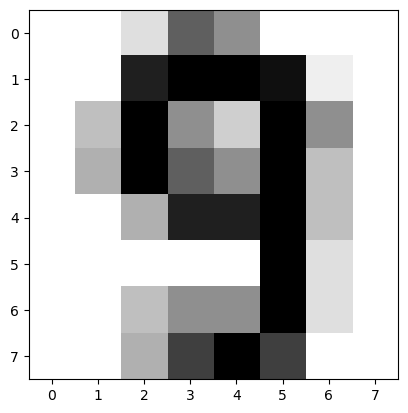

In [12]:
fig = plt.figure
plt.imshow(digits.images[-2], cmap='gray_r')
plt.show()

In [13]:
digits.target[-2]

9

In [14]:
X = digits.data
Y = digits.target
X, Y

(array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 array([0, 1, 2, ..., 8, 9, 8]))

In [15]:
x_train, x_test, y_train, y_test = tts(X, Y, shuffle=True, test_size=0.2, random_state=20)

In [16]:
lvq_digit = LVQ3(epsilon=0.6, alpha=0.65, decay=0.75, beta=0.25, m=0.2, epoch=50, random_state=20)
lvq_digit.fit(x_train, y_train)

In [18]:
result = lvq_digit.predict(x_test)

In [19]:
result

array([0, 7, 8, 5, 8, 1, 3, 3, 7, 0, 9, 4, 7, 4, 0, 1, 1, 8, 6, 3, 7, 8,
       4, 6, 1, 0, 1, 0, 5, 4, 7, 1, 6, 7, 8, 4, 3, 7, 4, 0, 5, 9, 0, 4,
       8, 5, 4, 3, 6, 3, 9, 2, 2, 5, 7, 3, 7, 6, 3, 9, 6, 6, 8, 6, 6, 5,
       0, 5, 3, 5, 0, 7, 3, 2, 9, 9, 3, 0, 2, 5, 5, 9, 2, 4, 5, 1, 7, 7,
       7, 1, 0, 4, 6, 1, 1, 7, 1, 9, 8, 3, 4, 6, 7, 8, 2, 1, 4, 0, 1, 3,
       6, 0, 5, 5, 6, 6, 0, 6, 2, 6, 9, 4, 1, 3, 4, 0, 6, 7, 7, 9, 7, 7,
       8, 2, 4, 2, 5, 1, 3, 8, 7, 9, 8, 0, 0, 6, 2, 6, 9, 0, 9, 0, 0, 8,
       7, 5, 9, 4, 0, 5, 6, 2, 6, 0, 4, 8, 7, 9, 2, 4, 3, 6, 4, 4, 5, 2,
       8, 0, 7, 7, 3, 2, 2, 9, 0, 7, 2, 1, 6, 7, 0, 1, 5, 1, 6, 4, 6, 1,
       7, 6, 1, 0, 8, 6, 5, 8, 8, 9, 6, 5, 1, 2, 6, 7, 5, 0, 1, 2, 4, 7,
       0, 9, 6, 7, 7, 6, 5, 1, 2, 5, 5, 4, 6, 1, 7, 6, 1, 8, 9, 6, 2, 8,
       5, 1, 3, 3, 9, 0, 3, 7, 9, 9, 2, 7, 0, 0, 5, 7, 3, 6, 3, 8, 1, 3,
       6, 9, 8, 3, 7, 4, 4, 0, 7, 1, 5, 6, 1, 4, 6, 4, 5, 6, 3, 7, 7, 5,
       2, 5, 6, 4, 0, 4, 2, 2, 3, 5, 0, 7, 0, 9, 7,

In [20]:
accuracy_score(result, y_test)

0.8972222222222223